<a href="https://colab.research.google.com/github/VadimUrupa1399/ML-with-Python/blob/master/xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Using XGBoost regression for example of supervised ML 

In [1]:
# import nessesary libraries and dataset
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# I'm using Boston house-price dataset for regression model
boston = load_boston()
x, y = boston.data, boston.target
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15)



In [3]:
#Define and fit the model
xgbr = xgb.XGBRegressor(verbosity=0)
print(xgbr)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)


In [5]:
xgbr.fit(xtrain, ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)

In [6]:
#check the model training score
score = xgbr.score(xtrain, ytrain)
print('Training score: ', score)

Training score:  0.9746232457618178


In [7]:
#applying cross validation method
scores = cross_val_score(xgbr, xtrain, ytrain, cv=10)
print('Mean cross_val score: ', scores.mean())

Mean cross_val score:  0.8885664224624235


In [9]:
#We can also use KFold method in cross_validation
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, xtrain, ytrain, cv=kfold)
print('Kfold CV average score: ', kf_cv_scores.mean())

Kfold CV average score:  0.8781942836196567


In [ ]:
#Both methods show the accuracy about 87%

In [10]:
#Now, we predict the test data
ypred = xgbr.predict(xtest)
mse = mean_squared_error(ytest, ypred)
print('MSE: ', mse)

MSE:  8.59100197224983


In [11]:
print('RMSE:', (mse**1/2.0))

RMSE: 4.295500986124915


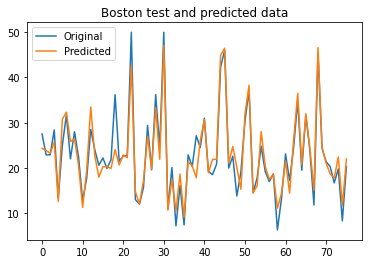

In [12]:
#Now, let's visualize the orginal and predicted data
x_ax = range(len(xtest))
plt.plot(x_ax, ytest, label='Original')
plt.plot(x_ax, ypred, label='Predicted')
plt.title('Boston test and predicted data')
plt.legend()
plt.show()